# <font style = "color:rgb(125, 41, 243)"> **The Iris Dataset - Notebook 2** </font>

## <font style = "color:rgb(125, 41, 243)"> **Required Libraries** </font>

These libraries will be used in this notebook. How to install these libraries can be found in **Notebook 1**

In [1]:
# Libraries used in this notebook

# Used to create interactive controls
# like sliders, radio buttons, etc
import ipywidgets as widgets

# Used to handle arrays and lists
import numpy as np

# Used to read tabular data
# CSV or excel files
import pandas as pd

# Used to check for missing values
import missingno as msno

# Graphing libraries used

# The seaborn graphing library
import seaborn as sns

# Matplot library
import matplotlib.pyplot as plt

# Plotly graphing library
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
# Set ploting and color parameters for seaborn

plt.rcParams.update({'figure.max_open_warning': 0})

sns.color_palette("bright")

sns.set_context("talk")

## <font style = "color:rgb(125, 41, 243)"> **Purpose** </font>

The purpose of this EDA is to prove the following hypothesis:

> It's expected that `Petal Length`, `Petal Width`, and `Sepal Length` will all have strong correlations that can be used in classifying between each species. It is expected that `Sepal Width` will not have a significant correlation.

## <font style = "color:rgb(125, 41, 243)"> **Loading the dataset** </font>

In [3]:
# Download the dataset from a URL
datasource_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [4]:
# Create a panda data frame object called 'iris_df'. This object holds the contents of our data in tabular format
iris_df = pd.read_csv(datasource_path, 
                      header =  None,
                      )

In [5]:
# This code creates a header row for our data, 

iris_headers = ['Sepal_Length_(cm)', 
                'Sepal_Width_(cm)',
                'Petal_Length_(cm)',
                'Petal_Width_(cm)',
                'Species'
               ]

In [6]:
# Add headers to dataframe

iris_df.columns = iris_headers

iris_df

,Sepal_Length_(cm),Sepal_Width_(cm),Petal_Length_(cm),Petal_Width_(cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## <font style = "color:rgb(125, 41, 243)"> **2-Feature Comparisons** </font>

### <font style = "color:rgb(125, 41, 243)"> **Seaborn pairplots** </font>

You can find more informaiton on seaborn pairplotting here: https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplots

The following plots are meant to determine their relationships in helping classify the Iris species:

In [7]:
%matplotlib widget

In [8]:
plot_kind = ['scatter', 'kde', 'hist', 'reg']

In [9]:
diag_plot_kind = ['auto', 'hist', 'kde', None]

In [10]:
@widgets.interact
def sns_pairplots(kind = plot_kind, diag_plot = diag_plot_kind):
    
    sns.pairplot(iris_df,
                 hue = 'Species',
                 kind = kind, # 'scatter' 'kde', 'hist', 'reg'
                 diag_kind = diag_plot, # 'auto', 'hist', 'kde', None 
                 #height = 5,
                 #aspect = 1.5
                )

interactive(children=(Dropdown(description='kind', options=('scatter', 'kde', 'hist', 'reg'), value='scatter')…

### <font style = "color:rgb(125, 41, 243)"> **Plotly Scatter Matrix** </font>

You can find more information on Plotly scatter matrix here: https://plotly.com/python/splom/

In [11]:
# Create a list to store values to color our data
labels = [None, 'Species']

labels

[None, 'Species']

In [12]:
# Create a list of column names
features = iris_df.columns

features

Index(['Sepal_Length_(cm)', 'Sepal_Width_(cm)', 'Petal_Length_(cm)',
       'Petal_Width_(cm)', 'Species'],
      dtype='object')

In [13]:
# Create a new object to store features
selected_features = features

selected_features

Index(['Sepal_Length_(cm)', 'Sepal_Width_(cm)', 'Petal_Length_(cm)',
       'Petal_Width_(cm)', 'Species'],
      dtype='object')

In [14]:
# Delete the 'Species' element from this list
# This list will be fed into the "dimensions" parameter below
selected_features = np.delete(selected_features, -1)

selected_features

Index(['Sepal_Length_(cm)', 'Sepal_Width_(cm)', 'Petal_Length_(cm)',
       'Petal_Width_(cm)'],
      dtype='object')

In [15]:
@widgets.interact
def pairplots(label = labels):    
    fig = px.scatter_matrix(iris_df,
                            dimensions = selected_features,
                            color = label,
                            height = 1200,
                            width = 1500,
                           )
    
    fig.update_traces(diagonal_visible = False)

    fig.show()

interactive(children=(Dropdown(description='label', options=(None, 'Species'), value=None), Output()), _dom_cl…

### <font style = "color:rgb(125, 41, 243)"> **Plotly Scatter Plot** </font>

Refer to the following website for more informaiton on Plotly scatterplots: https://plotly.com/python/line-and-scatter/

In [16]:
# Shows distribution information 
scatter_marginals = [None, 'histogram', 'box', 'violin', 'rug']

In [17]:
# This checkbox will allow you to enable / disable
# the X-Axis going onto a log scale
# default is FALSE
scatterLogX = widgets.Checkbox(value = False,
                                 description = 'Log X scale',
                                 disabled = False,
                                 indent = False
                                 )

In [18]:
# This checkbox will allow you to enable / disable
# the Y-Axis going onto a log scale
# default is FALSE
scatterLogY = widgets.Checkbox(value = False,
                               description = 'Log Y scale',
                               disabled = False,
                               indent = False
                               )

In [19]:
# Confirm the labels created
labels

[None, 'Species']

In [20]:
# Create a new features object to 
# use in the scatter plot
features_y = features

features_y

Index(['Sepal_Length_(cm)', 'Sepal_Width_(cm)', 'Petal_Length_(cm)',
       'Petal_Width_(cm)', 'Species'],
      dtype='object')

In [21]:
# Insert none as the default value
features_y = features_y.insert(0, None)

features_y

Index([               None, 'Sepal_Length_(cm)',  'Sepal_Width_(cm)',
       'Petal_Length_(cm)',  'Petal_Width_(cm)',           'Species'],
      dtype='object')

In [22]:
# This notebook will not use 
# this widget, nevertheless it's here 
# in case these scripts are used elsewhere
bubble_sizes = [None,]

In [23]:
# Creates a regression trendline
scatter_trendline =  [None, 'ols', 'lowess', 'rolling', 'expanding', 'ewm']

In [24]:
# Defines the type of trendline
scatter_trendline_scope = ['trace', 'overall']

In [25]:
@widgets.interact
def scatter_inspector(sizes = bubble_sizes, regression = scatter_trendline, scope = scatter_trendline_scope,  log_x = scatterLogX, log_y = scatterLogY, label = labels, y_distribution = scatter_marginals, y_feature = features_y, x_distribution = scatter_marginals, x_feature = features):  
    try:
        fig = px.scatter(iris_df,
                         x = x_feature,
                         y = y_feature,
                         size = sizes,
                         color = label,
                         trendline = regression,
                         trendline_scope = scope,
                         log_x = log_x,
                         log_y = log_y,
                         marginal_x = x_distribution,
                         marginal_y = y_distribution,
                         hover_data = iris_df.columns,
                         height = 800,
                         width = 1600
                        )
        fig.update_layout(plot_bgcolor = None)
        fig.show()
    
    except:
        print("ERROR: Unable to generate plot")

interactive(children=(Dropdown(description='sizes', options=(None,), value=None), Dropdown(description='regres…

### <font style = "color:rgb(125, 41, 243)"> **2D Histogram Contour in Python** </font>

Refer to the following website for more informaiton on Plotly scatterplots: https://plotly.com/python/2d-histogram-contour/

In [26]:
density_marginals = [None, 'histogram', 'box', 'violin', 'rug']

In [27]:
# This checkbox will allow you to enable / disable
# the X-Axis going onto a log scale
# default is FALSE
densityLogX = widgets.Checkbox(value = False,
                                 description = 'Log X scale',
                                 disabled = False,
                                 indent = False
                                 )

In [28]:
# This checkbox will allow you to enable / disable
# the Y-Axis going onto a log scale
# default is FALSE
densityLogY = widgets.Checkbox(value = False,
                               description = 'Log Y scale',
                               disabled = False,
                               indent = False
                               )

In [29]:
function = ['count', 'sum', 'avg', 'min', 'max']

In [30]:
normalizer = [None, 'percent', 'probability', 'density', 'probability density']

In [31]:
scatter_trendline =  [None, 'ols', 'lowess', 'rolling', 'expanding', 'ewm']

In [32]:
scatter_trendline_scope = [None, 'trace', 'overall']

In [33]:
@widgets.interact
def density_contour_inspector(log_x = scatterLogX, log_y = scatterLogY, hist_norm = normalizer, hist_type = function,  label = labels, y_distribution = scatter_marginals, z_feature = features_y, y_feature = features_y, x_distribution = scatter_marginals, x_feature = features):  
    try:
        fig = px.density_contour(iris_df,
                                 x = x_feature,
                                 y = y_feature,
                                 z = z_feature,
                                 color = label,
                                 log_x = log_x,
                                 log_y = log_y,
                                 histfunc = hist_type,
                                 histnorm = hist_norm,
                                 marginal_x = x_distribution,
                                 marginal_y = y_distribution,
                                 hover_data = iris_df.columns,
                                 height = 800,
                                 width = 1600
                                )
        fig.update_layout(plot_bgcolor = None)
        #fig.update_traces(contours_coloring = "fill", contours_showlabels = True)
        fig.show()
    
    except:
        print("ERROR: Unable to generate plot")

interactive(children=(Checkbox(value=False, description='Log X scale', indent=False), Checkbox(value=False, de…

### <font style = "color:rgb(125, 41, 243)"> **Seaborn Distribution Plots** </font>

You can learn more about these kinds of plots here: https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot

In [34]:
plots = ['hist', 'kde', 'ecdf']

In [35]:
@widgets.interact
def sns_displots(kind = plots, x_feature = features, y_feature = features):
    
    try:
        
        sns.displot(iris_df, 
                    x = x_feature, 
                    y = y_feature, 
                    hue = "Species", 
                    kind = kind
                   )
    except:
        
        print("ERROR: Cannot produce graph")

interactive(children=(Dropdown(description='kind', options=('hist', 'kde', 'ecdf'), value='hist'), Dropdown(de…

#### <font style = "color:rgb(125, 41, 243)"> **Observations** </font>

Petal length and width are key features in classifying, along with Sepal length. 

## <font style = "color:rgb(125, 41, 243)"> **3-Feature Comparisons (3D Plots)** </font>

You can learn more about 3D scatter plots here: https://plotly.com/python/3d-scatter-plots/

In [36]:
# This checkbox will allow you to enable / disable
# the X-Axis going onto a log scale
# default is FALSE
scatterLogX3D = widgets.Checkbox(value = False,
                                 description = 'Log X scale',
                                 disabled = False,
                                 indent = False
                                 )

In [37]:
# This checkbox will allow you to enable / disable
# the Y-Axis going onto a log scale
# default is FALSE
scatterLogY3D = widgets.Checkbox(value = False,
                                 description = 'Log Y scale',
                                 disabled = False,
                                 indent = False
                                 )

In [38]:
# This checkbox will allow you to enable / disable
# the Y-Axis going onto a log scale
# default is FALSE
scatterLogZ3D = widgets.Checkbox(value = False,
                                 description = 'Log Z scale',
                                 disabled = False,
                                 indent = False
                                )

In [39]:
# This widget allows you to create a histogram, like the ones produces in the previous notebook.
# You can change the feature, along with 
@widgets.interact
def scatter_inspect(zlog = scatterLogZ3D, ylog = scatterLogY3D, xlog = scatterLogX3D, label = labels, z_feature = features, y_feature = features, x_feature = features):
    fig = px.scatter_3d(iris_df,
                        x = x_feature,
                        y = y_feature,
                        z = z_feature,
                        log_x = xlog,
                        log_y = ylog,
                        log_z = zlog,
                        color = label,
                        height = 800,
                        width = 1500
                       )
    
    fig.show()

interactive(children=(Checkbox(value=False, description='Log Z scale', indent=False), Checkbox(value=False, de…

## <font style = "color:rgb(125, 41, 243)"> **Parallel Coordinates / Parallel Categorical** </font>

### <font style = "color:rgb(125, 41, 243)"> **Parallel Coordinates** </font>

To learn more about Parallel Coordinate plots: https://plotly.com/python/parallel-coordinates-plot/

In order to plot, the species field - a categorical field - needs to be changed to numerical:

In [40]:
# The library needed to convert the feature

from sklearn.preprocessing import LabelEncoder

In [41]:
# Creating an instance of labelencoder

labelencoder = LabelEncoder()

labelencoder

LabelEncoder()

In [42]:
# Assigning numerical values and storing it in another column called "Class"

iris_df['Species_id'] = labelencoder.fit_transform(iris_df['Species'])

iris_df

,Sepal_Length_(cm),Sepal_Width_(cm),Petal_Length_(cm),Petal_Width_(cm),Species,Species_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


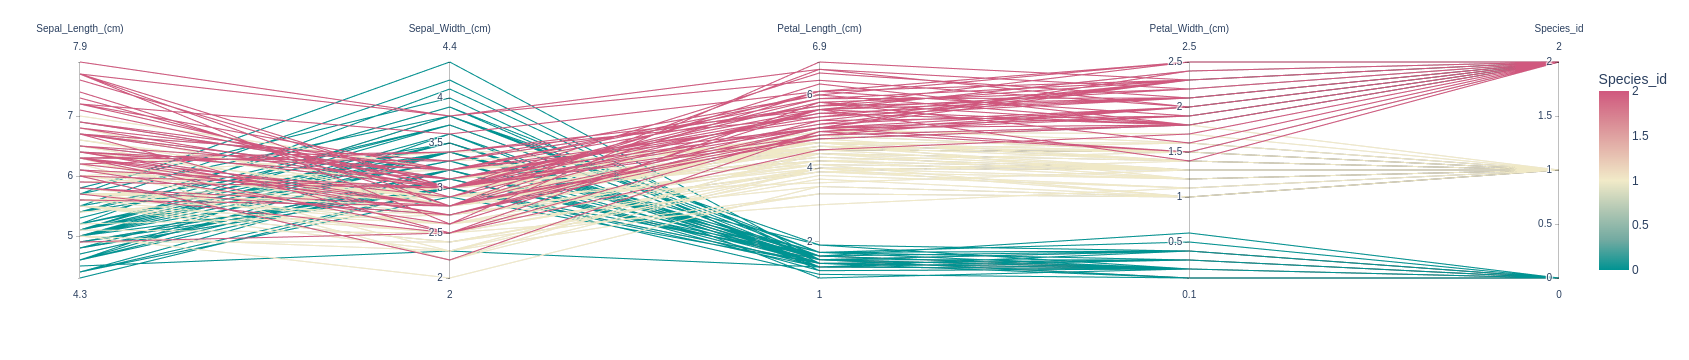

In [43]:
fig = px.parallel_coordinates(iris_df, 
                              dimensions = iris_df, 
                              color = "Species_id", 
                              
                              color_continuous_scale = px.colors.diverging.Tealrose,
                             
                              #color_continuous_midpoint = 2
                             )
fig.show()

### <font style = "color:rgb(125, 41, 243)"> **Parallel Categorial** </font>

These plots only work on categorical features. To learn more on how to use them: https://plotly.com/python/parallel-categories-diagram/

## <font style = "color:rgb(125, 41, 243)"> **Hypothesis Testing** </font>

In [44]:
result = iris_df.corr()

result

,Sepal_Length_(cm),Sepal_Width_(cm),Petal_Length_(cm),Petal_Width_(cm),Species_id
Sepal_Length_(cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal_Width_(cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal_Length_(cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal_Width_(cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Species_id,0.782561,-0.419446,0.949043,0.956464,1.000000


In [45]:
correlation_type = ['pearson', 'kendall', 'spearman']

In [46]:
title_x = list(result.columns)

title_x

['Sepal_Length_(cm)',
 'Sepal_Width_(cm)',
 'Petal_Length_(cm)',
 'Petal_Width_(cm)',
 'Species_id']

In [47]:
title_y = list(result.columns)

title_y

['Sepal_Length_(cm)',
 'Sepal_Width_(cm)',
 'Petal_Length_(cm)',
 'Petal_Width_(cm)',
 'Species_id']

In [48]:
@widgets.interact
def correlations(correlation = correlation_type):
    result = iris_df.corr(correlation)
    
    result = result.round(3)
    
    fig = ff.create_annotated_heatmap(result.values,
                                      y = title_x,
                                      x = title_y,
                                      colorscale = 'Plasma',
                                      showscale = True,
                                      reversescale = True,
                                     )
    
    fig.update_layout(title_text = 'Correlation Matrix',
                      height = 1000,
                     )
    
    fig.show()

interactive(children=(Dropdown(description='correlation', options=('pearson', 'kendall', 'spearman'), value='p…

## <font style = "color:rgb(125, 41, 243)"> **Pearson and Spearman Correlation** </font>

Information can be found here: https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

## <font style = "color:rgb(125, 41, 243)"> **Kendall's Rank Correlation** </font>

Information can be found here: https://www.statsdirect.com/help/nonparametric_methods/kendall_correlation.htm